## GLOBAL SUPERSTORE DATASET

Global Superstore, a well-known online retailer with an extensive product selection, is based in New York. Dedicated to providing for its international clientele, the business serves clients in 147 nations by providing access to over 10,000 unique products. These products fall into three primary categories: furniture (including chairs), office supplies (such staples), and technology items (like smartphones). 

## AIMS
The project's goal is to gather insightful information by analyzing the Superstore dataset. These understandings will enable management to take well-informed decisions that raise profitability and performance levels overall.

## EXPLORATORY DATA ANALYSIS (EDA)

- **Question 1**:
Which three nations brought in the most money overall for Global Superstore in 2014?
- **Question 2**:
Determine which three subcategories in the US have the greatest average shipping costs.
- **Question 3**:
Evaluating the profitability (i.e., total profit) of the United Kingdom in 2014. In what way does it differ from other nations?
- **Question 4**:
Determine which product subcategory in Southeast Asia is the least profitable. Is there a particular Southeast Asian nation where Global Superstore ought to cease carrying the subcategory? 
- **Question 5**:
Evaluate the long-term trends in sales, profit, and transportation expenses. In different storylines 
- **Question 6**:
Determine the correlation between the sales dataset's numerical variables. 
- **Question 7**:
In terms of average profit, which American city is the least profitable? Eliminate the cities with fewer than ten Orders for this study. b) Why is the average profit in this city so low? 
- **Question 8**:
What do the most valuable clients buy, and who are they?


Link to the Dataset and other informations are embedded in the 2 pages documentation and Github: https://github.com/Covpet/GLOBAL-SUPERSTORE-STATISTICS-AND-TREND-/tree/main

## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## READING FILES

In [7]:
"""
This code reads a CSV file into a pandas dataframe and prints the first few rows as well as the number of rows in the dataframe.
Replacing 'file_path' with the actual file path in your desktop.
"""

file_path = '/Users/HP/Desktop/ADSASS/Stores.csv'
Stores_df = pd.read_csv(file_path, encoding='latin1')

print(Stores_df.head())
print("Number of rows:", len(Stores_df))

    Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0  32298.0   CA-2012-124891   7/31/2012   7/31/2012      Same Day    RH-19495   
1  26341.0    IN-2013-77878    2/5/2013    2/7/2013  Second Class    JR-16210   
2  25330.0    IN-2013-71249  10/17/2013  10/18/2013   First Class    CR-12730   
3  13524.0  ES-2013-1579342   1/28/2013   1/30/2013   First Class    KM-16375   
4  47221.0     SG-2013-4320   11/5/2013   11/6/2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

     Category  Sub-Category  \
0  Technology   Accessories   
1   Furnitur

## DATA CLEANING

In [3]:
print(Stores_df.isnull().sum())

Row ID            1173
Order ID             0
Order Date        1173
Ship Date         1173
Ship Mode         1173
Customer ID       1173
Customer Name     1173
Segment           1173
City              1173
State             1173
Country           1173
Postal Code       1173
Market               0
Region            1173
Product ID        1173
Category          1173
Sub-Category      1173
Product Name      1173
Sales             1173
Quantity          1173
Discount          1173
Profit            1173
Shipping Cost     1173
Order Priority    1173
NewReturn            0
dtype: int64


In [10]:
# Replace missing values with 0
Stores_df.fillna(0, inplace=True)
print(Stores_df)

        Row ID         Order ID  Order Date   Ship Date     Ship Mode  \
0      32298.0   CA-2012-124891   7/31/2012   7/31/2012      Same Day   
1      26341.0    IN-2013-77878    2/5/2013    2/7/2013  Second Class   
2      25330.0    IN-2013-71249  10/17/2013  10/18/2013   First Class   
3      13524.0  ES-2013-1579342   1/28/2013   1/30/2013   First Class   
4      47221.0     SG-2013-4320   11/5/2013   11/6/2013      Same Day   
...        ...              ...         ...         ...           ...   
52458      0.0  ES-2013-2639112           0           0             0   
52459      0.0   CA-2014-134194           0           0             0   
52460      0.0  ES-2012-3246286           0           0             0   
52461      0.0  ES-2012-4379168           0           0             0   
52462      0.0   CA-2014-168193           0           0             0   

      Customer ID     Customer Name      Segment           City  \
0        RH-19495       Rick Hansen     Consumer  New Yo

In [5]:
#Check for duplicates
print(Stores_df.duplicated().sum())

0


## DESCRIPTIVE STATISTICS

In [14]:
"""
This code calculates and prints the descriptive statistics of the 'Stores_df' dataframe.
"""
descriptive_stats = Stores_df.describe()
print(descriptive_stats)

             Row ID   Postal Code         Sales      Quantity      Discount  \
count  52463.000000  52463.000000  52463.000000  52463.000000  52463.000000   
mean   25072.102148  10513.555306    240.979393      3.398814      0.139712   
std    15122.868664  25798.269798    483.459303      2.311032      0.210954   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%    11943.500000      0.000000     28.512000      2.000000      0.000000   
50%    25059.000000      0.000000     81.360000      3.000000      0.000000   
75%    38174.500000      0.000000    245.700000      5.000000      0.200000   
max    51290.000000  99301.000000  22638.480000     14.000000      0.850000   

             Profit  Shipping Cost  
count  52463.000000   52463.000000  
mean      27.971281      25.786091  
std      172.432799      56.786692  
min    -6599.978000       0.000000  
25%        0.000000       2.400000  
50%        8.700000       7.443000  
75%       35.694000      23.6

In [15]:
import pandas as pd
from scipy.stats import skew, kurtosis

numeric_columns = Stores_df.select_dtypes(include=['float64', 'int64'])
skewness = numeric_columns.skew()

kurt = numeric_columns.kurtosis()

print("Skewness:")
print(skewness)
print("\nKurtosis:")
print(kurt)

Skewness:
Row ID           0.004763
Postal Code      2.416361
Sales            8.191793
Quantity         1.299846
Discount         1.420980
Profit           4.211687
Shipping Cost    5.916908
dtype: float64

Kurtosis:
Row ID            -1.206029
Postal Code        4.390412
Sales            179.132243
Quantity           2.158450
Discount           0.815219
Profit           297.843695
Shipping Cost     50.968498
dtype: float64


In [21]:
import pandas as pd

# Convert 'Order Date' to datetime with errors='coerce' to handle non-date values
Stores_df['Order Date'] = pd.to_datetime(Stores_df['Order Date'], format='%m/%d/%Y', errors='coerce')

# Drop NaT (Not a Time) values
Stores_df = Stores_df.dropna(subset=['Order Date'])

# Get the maximum date in the dataframe
max_date = Stores_df['Order Date'].max()

# Calculate the last date of the year based on the maximum date
last_date_of_year = max_date.replace(month=12, day=31)

print("Last date of the year in the dataframe:", last_date_of_year)

Last date of the year in the dataframe: 2014-12-31 00:00:00


**QUESTION 1 (CATEGORICAL GRAPH)**

In [19]:
def plot_top_countries_profit_pie(dataframe, year, n=3):
    """
    Create a pie chart to visualize the total profit generated by the top n countries in a specific year.
    The year for which the data will be filtered.
    The number of top countries to display in the pie chart. Default is 3.

    """
    
    dataframe['Order Date'] = pd.to_datetime(dataframe['Order Date'], errors='coerce')
    data_year = dataframe[dataframe['Order Date'].dt.year == year]
    country_total_profit = data_year.groupby('Country')['Profit'].sum()
    top_countries_profit = country_total_profit.nlargest(n)
    plt.figure(figsize=(8, 8))
    plt.pie(top_countries_profit, labels=top_countries_profit.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Top {n} Countries with Highest Total Profit in {year}')
    plt.show()

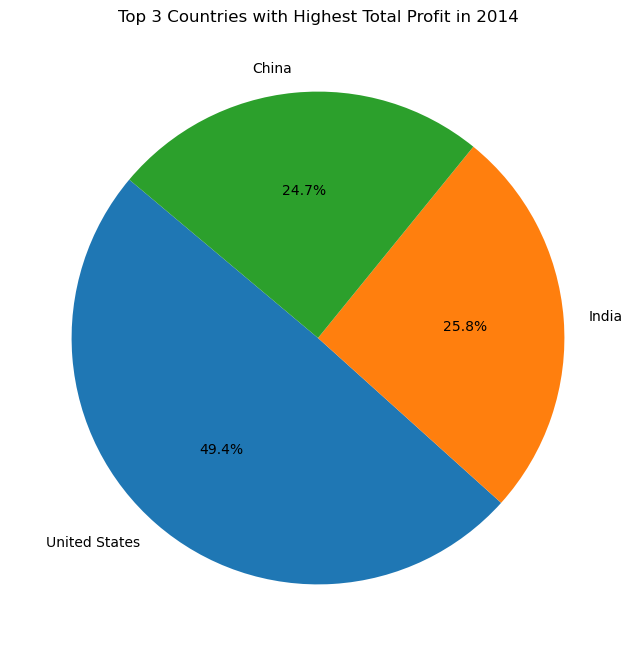

In [20]:
plot_top_countries_profit_pie(Stores_df, 2014, 3)

**QUESTION 2 (CATEGORICAL GRAPH)**

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_top_shipping_costs(dataframe, country, n=3):
    """
    Create a bar chart to visualize the average shipping cost for the top n subcategories in a specific country.
    Filter the data for the specified country
    Group by subcategory and calculate the average shipping cost for each subcategory
    Create a bar chart to visualize the average shipping cost for the top n subcategories
    Add the exact values on top of each bar
    """
    
    country_data = dataframe[dataframe['Country'] == country]
    top_subcategory_shipping = country_data.groupby('Sub-Category')['Shipping Cost'].mean().nlargest(n)
    plt.figure(figsize=(10, 6))
    bar_plot = top_subcategory_shipping.plot(kind='bar', color='Red')
    plt.title(f'Top {n} Subcategories with Highest Average Shipping Cost in {country}')
    plt.xlabel('Subcategory')
    plt.ylabel('Average Shipping Cost')

    for index, value in enumerate(top_subcategory_shipping):
        bar_plot.text(index, value, str(round(value, 2)), ha='center', va='bottom')

    plt.show()

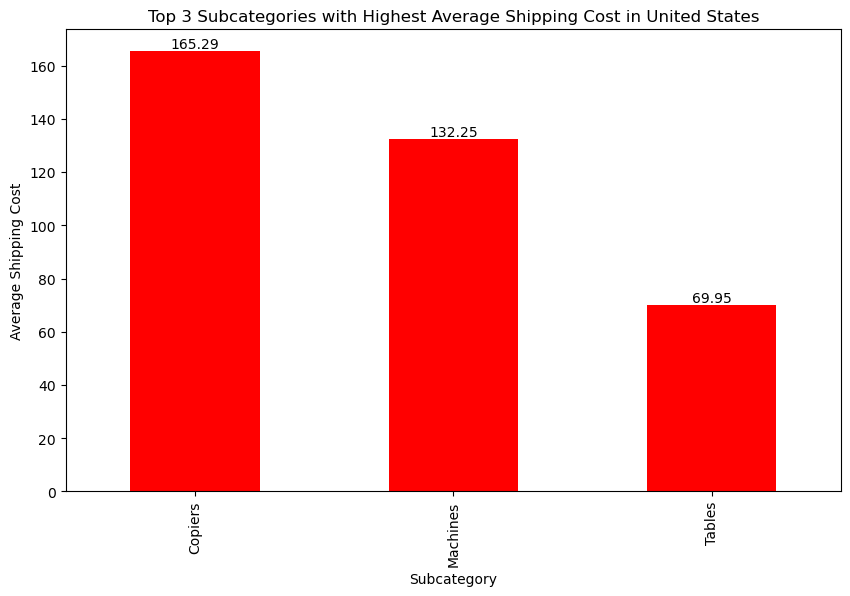

In [22]:
plot_top_shipping_costs(Stores_df, country='United States', n=3)

**QUESTION 3 (CATEGORICAL GRAPH)**

In [28]:
United_Kingdom = Stores_df[Stores_df['Country'] == 'United Kingdom']
United_Kingdom_2014 = United_Kingdom['Profit'].sum()

# Group the data by country and calculate the total profit for each country
total_profit_by_country = Stores_df.groupby('Country')['Profit'].sum().reset_index(name='Total Profit')

# Sort the total profit by country in descending order
total_profit_by_country = total_profit_by_country.sort_values(by='Total Profit', ascending=False)

# Print the total profit for United Kingdom and compare it to other countries
print("Total Profit for United Kingdom in 2014:", United_Kingdom_2014)
print("\nTotal Profit by Country:")
print(total_profit_by_country)

Total Profit for United Kingdom in 2014: 111900.15

Total Profit by Country:
            Country  Total Profit
140   United States   286397.0217
27            China   150683.0850
58            India   129071.8350
139  United Kingdom   111900.1500
45           France   109029.0030
..              ...           ...
97         Pakistan   -22446.6480
55         Honduras   -29482.3714
91      Netherlands   -41070.0750
95          Nigeria   -80750.7180
134          Turkey   -98447.2320

[148 rows x 2 columns]


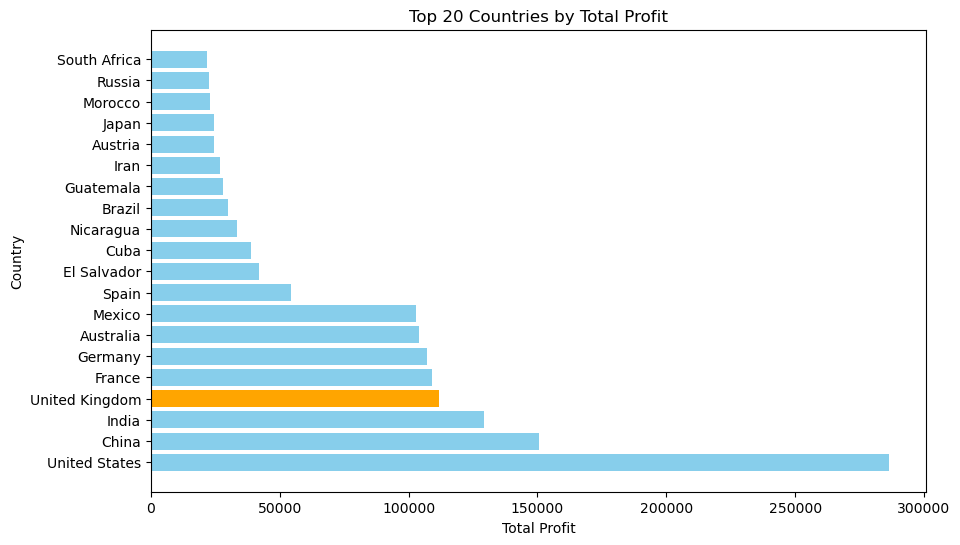

In [32]:
# Limiting the number of countries to display
top_countries = total_profit_by_country.head(20)  # Displaying the top 20 countries by profit

# Plotting the horizontal bar graph with specific color for the United Kingdom
colors = ['skyblue' if country != 'United Kingdom' else 'orange' for country in top_countries['Country']]
plt.figure(figsize=(10, 6))
plt.barh(top_countries['Country'], top_countries['Total Profit'], color=colors)
plt.xlabel('Total Profit')
plt.ylabel('Country')
plt.title('Top 20 Countries by Total Profit')
plt.show()

In [30]:
def analyze_uk_profitability(Stores_df):
    """
    Analyzes the profitability of products in the United Kingdom.
    Sort the dataframe by profitability (e.g., sales) in descending order and display only the top 10 products
    Display the resulting dataframe with the rows as the product names
    """
    #Filter the dataframe to include only rows where the country is the United Kingdom
    uk_df = Stores_df[Stores_df['Country'] == 'United Kingdom']
    #Calculate the average discount, shipping cost, quantity, and sales for each product
    uk_profitability = uk_df.groupby('Product Name').agg({'Discount': 'mean', 'Shipping Cost': 'mean', 'Quantity': 'mean', 'Sales': 'mean'})
    top_10_profitable_products = uk_profitability.sort_values(by='Sales', ascending=False).head(10)
    print(top_10_profitable_products)

In [31]:
analyze_uk_profitability(Stores_df)

                                              Discount  Shipping Cost  \
Product Name                                                            
Motorola Smart Phone, Cordless                    0.00        656.730   
Barricks Conference Table, Fully Assembled        0.00        432.130   
KitchenAid Refrigerator, Black                    0.00        730.910   
Hoover Stove, Red                                 0.00        398.500   
Cisco Smart Phone, Cordless                       0.05        344.710   
Nokia Smart Phone, Cordless                       0.05        287.475   
Memorex Router, Bluetooth                         0.00        135.250   
Chromcraft Computer Table, Adjustable Height      0.00        238.030   
Bush Classic Bookcase, Pine                       0.00        393.460   
Brother Fax Machine, Laser                        0.00        406.730   

                                              Quantity     Sales  
Product Name                                            

**QUESTION 4 (STATISTICAL GRAPH)**

In [42]:
def visualize_profitability(Stores_df):
    """
    Identify the least profitable product subcategory
    Create a heatmap graph to visualize the profitability of product subcategories in Southeast Asia
    
    """
    #Visualizes the profitability of product subcategories in Southeast Asia.
    southeast_asia_df = Stores_df[Stores_df['Region'] == 'Southeast Asia']
    
    #Filter the dataframe to include only rows where the region is Southeast Asia
    profitability_by_subcategory = southeast_asia_df.groupby('Sub-Category').agg({'Profit': 'mean'})
    
    #Calculate the profitability for each product subcategory
    least_profitable_subcategory = profitability_by_subcategory.idxmin()
    plt.figure(figsize=(10, 6))
    heatmap = sns.heatmap(profitability_by_subcategory, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Profitability'})
    plt.title('Profitability of Product Subcategories in Southeast Asia')
    plt.xlabel('Product Subcategory')
    plt.ylabel('Profitability')
    plt.show()

    print("The least profitable product subcategory in Southeast Asia is:", least_profitable_subcategory[0])

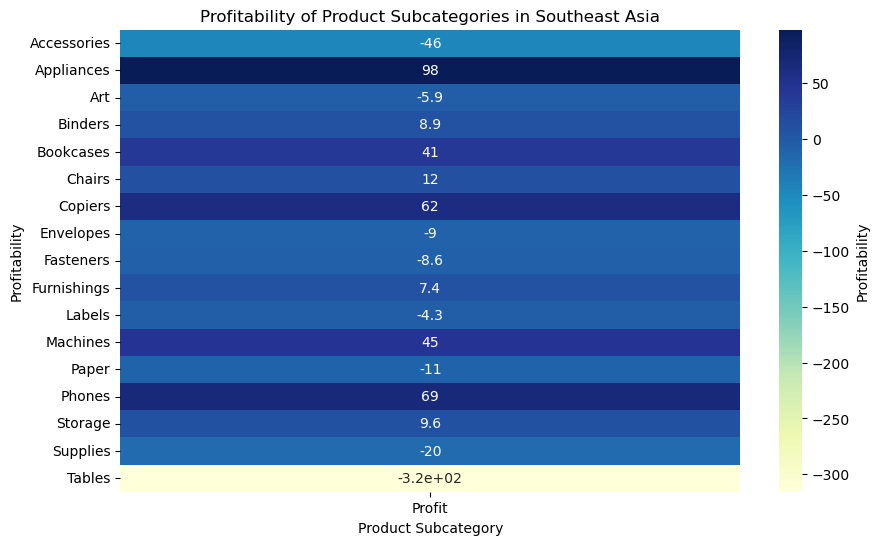

The least profitable product subcategory in Southeast Asia is: Tables


In [43]:
visualize_profitability(Stores_df)

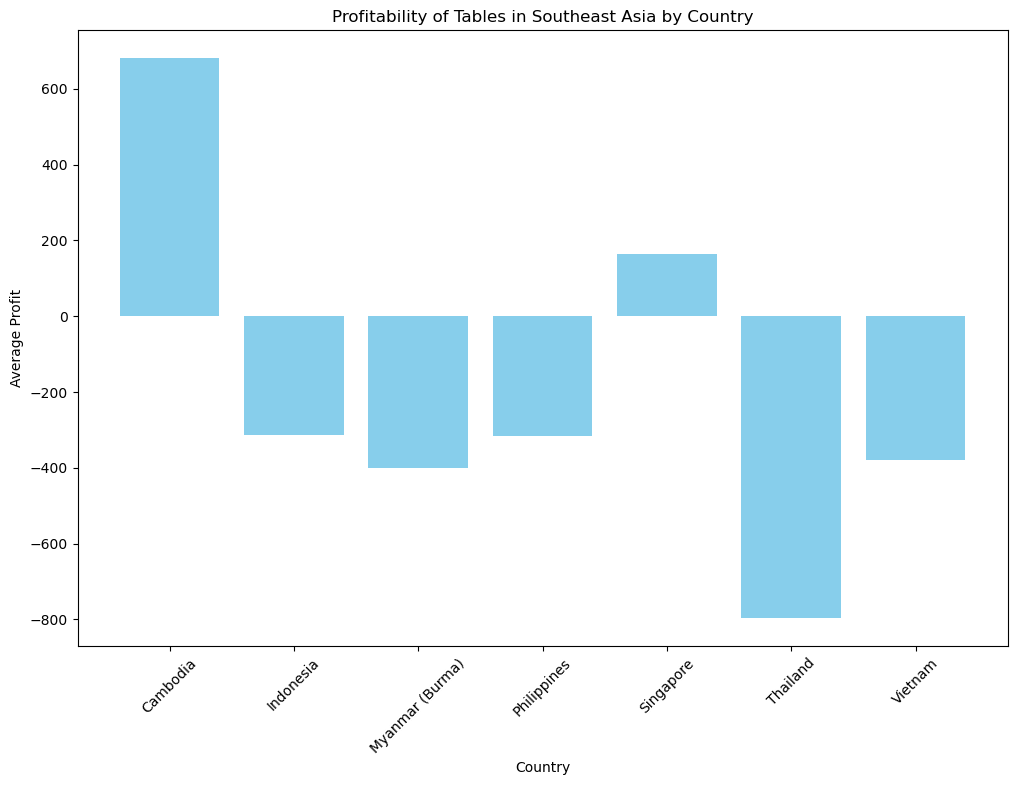

The country in Southeast Asia with the lowest profitability for the subcategory 'Tables' is: Thailand


In [6]:
def identify_lowest_profitability_country(Stores_df, subcategory):
    """
    Identifies the country in Southeast Asia with the lowest profitability for a specific subcategory.
    Filter the dataframe to include only rows where the region is Southeast Asia
    Calculate the profitability for the specified subcategory in each country
    Identify the country with the lowest profitability for the specified subcategory
    Create a bar plot to visualize the profitability of the specified subcategory in each country
    """
    
    southeast_asia_df = Stores_df[Stores_df['Region'] == 'Southeast Asia']
    profitability_by_country = southeast_asia_df[southeast_asia_df['Sub-Category'] == subcategory].groupby('Country').agg({'Profit': 'mean'})
    lowest_profitability_country = profitability_by_country.idxmin()

    plt.figure(figsize=(12, 8))
    plt.bar(profitability_by_country.index, profitability_by_country['Profit'], color='skyblue')
    plt.xlabel('Country')
    plt.ylabel('Average Profit')
    plt.title(f'Profitability of {subcategory} in Southeast Asia by Country')
    plt.xticks(rotation=45)  
    plt.show()

    return lowest_profitability_country[0]

subcategory = 'Tables'
lowest_profitability_country = identify_lowest_profitability_country(Stores_df, subcategory)
print(f"The country in Southeast Asia with the lowest profitability for the subcategory '{subcategory}' is: {lowest_profitability_country}")

## QUESTION 5 (RELATIONAL GRAPH)

In [48]:
# Convert Order Date and Ship Date to datetime format
Stores_df['Order Date'] = pd.to_datetime(Stores_df['Order Date'])
Stores_df['Ship Date'] = pd.to_datetime(Stores_df['Ship Date'])


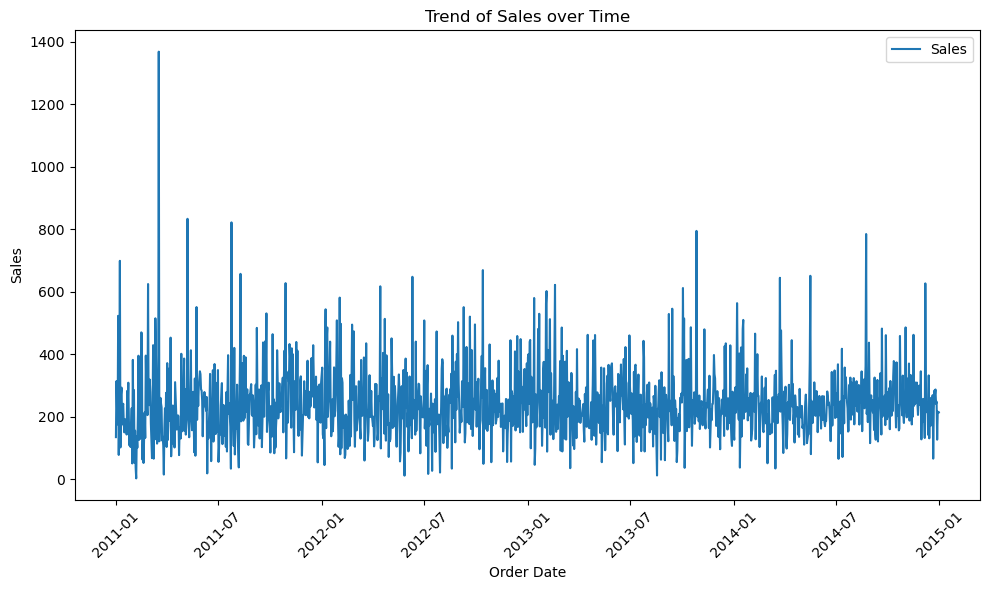

In [49]:
# Group data by Order Date and aggregate based on mean (you can change aggregation method as needed)
grouped_data = Stores_df.groupby('Order Date')['Sales'].mean().reset_index()

def plot_sales_trend():
    """
    Plot the trend of Sales over time.
    :return: None
    """
    plt.figure(figsize=(10, 6))
    plt.plot(grouped_data['Order Date'], grouped_data['Sales'], label='Sales')
    plt.title('Trend of Sales over Time')
    plt.xlabel('Order Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
plot_sales_trend()

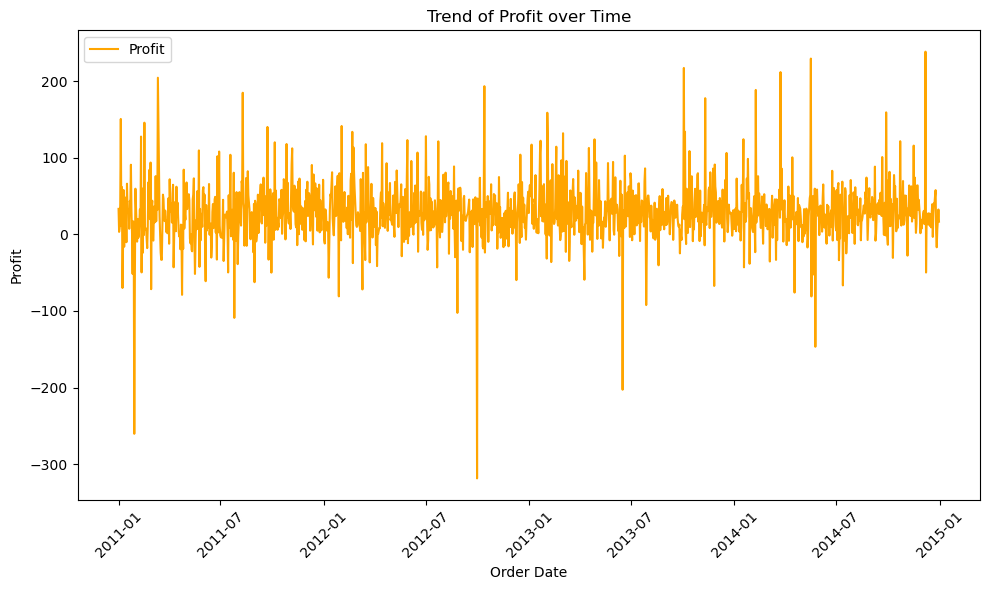

In [46]:
grouped_data = Stores_df.groupby('Order Date')['Profit'].mean().reset_index()

def plot_profit_trend():
    """
    Plot the trend of Profit over time.
    :return: None
    """
    plt.figure(figsize=(10, 6))
    plt.plot(grouped_data['Order Date'], grouped_data['Profit'], label= 'Profit', color='orange')
    plt.title('Trend of Profit over Time')
    plt.xlabel('Order Date')
    plt.ylabel('Profit')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
plot_profit_trend()

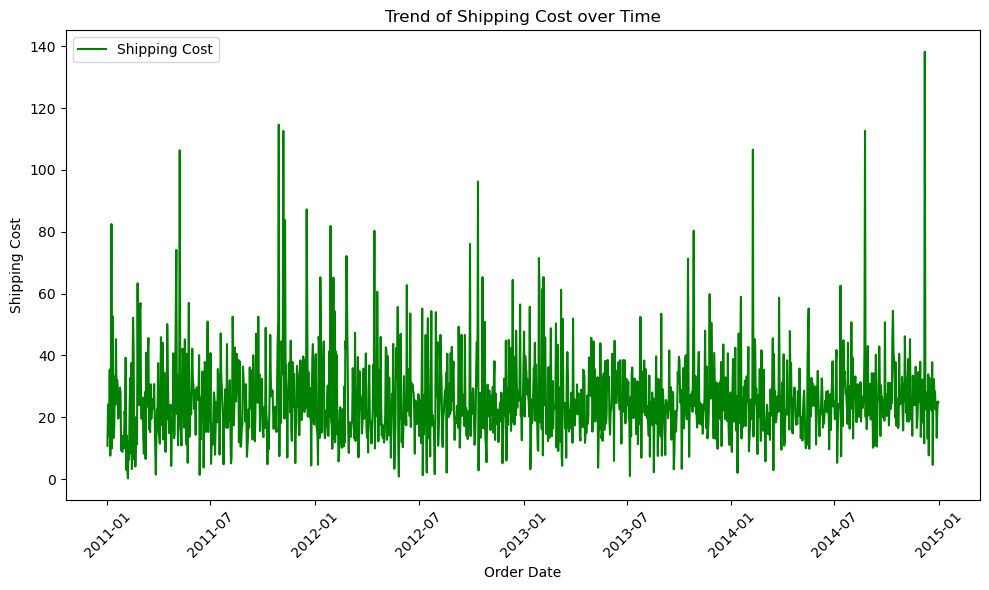

In [47]:
grouped_data = Stores_df.groupby('Order Date')['Shipping Cost'].mean().reset_index()
# Plot line chart for Shipping Cost
def plot_shipping_cost_trend():
    plt.figure(figsize=(10, 6))
    plt.plot(grouped_data['Order Date'], grouped_data['Shipping Cost'], label='Shipping Cost', color='green')
    plt.title('Trend of Shipping Cost over Time')
    plt.xlabel('Order Date')
    plt.ylabel('Shipping Cost')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the individual plot functions
plot_shipping_cost_trend()

## QUESTION 6 (STATISTICAL GRAPH)

In [4]:
def plot_correlation_matrix(Stores_df, method):
    """
    Plots correlation matrix with different methods
    Select the columns of interest
    Create a mask for the upper triangle
    Plot the correlation matrix
    """
    fig, ax = plt.subplots(dpi=144)

    df_selected = Stores_df[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']]

    mask = np.triu(np.ones_like(df_selected.corr()))
    sns.heatmap(df_selected.corr(method=method), ax=ax, vmin=-1, vmax=1, cmap='RdBu', annot=True, mask=mask)
    plt.title(method.capitalize())
    plt.show()

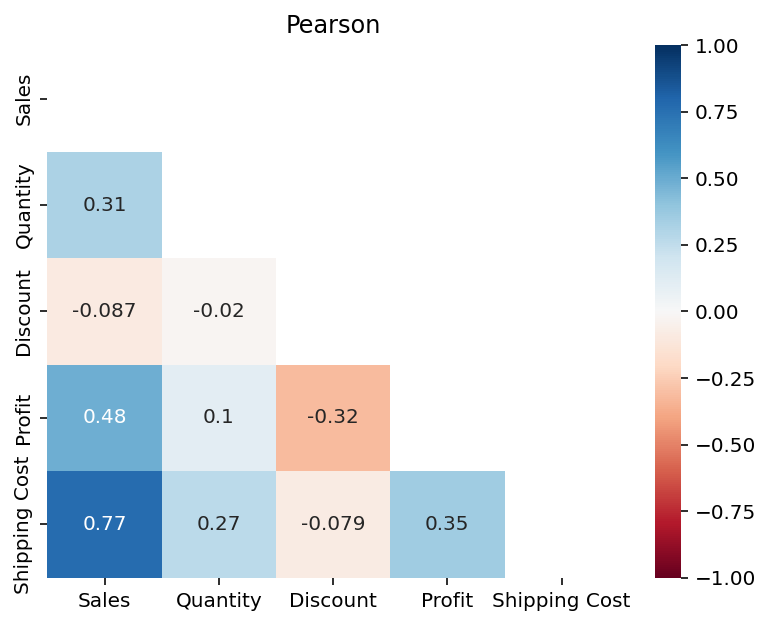

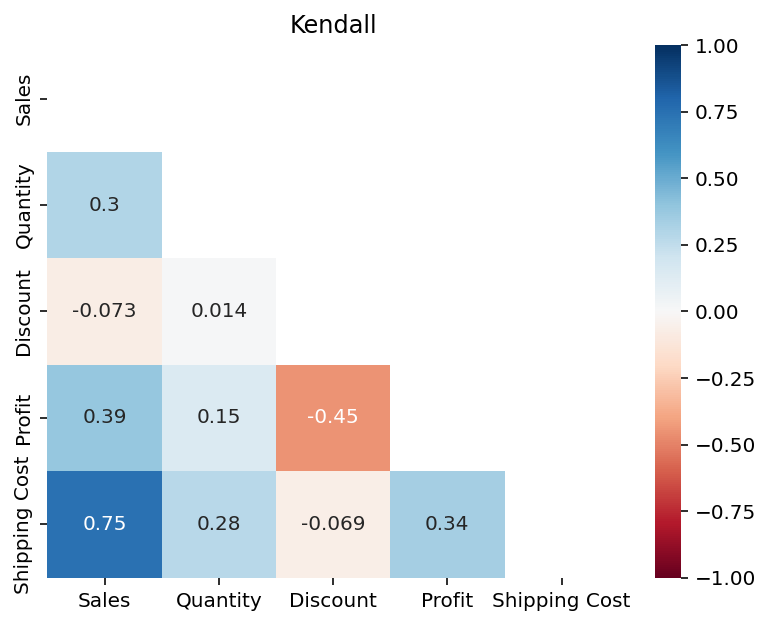

In [5]:
plot_correlation_matrix(Stores_df, 'pearson')
plot_correlation_matrix(Stores_df, 'kendall')

## QUESTION 7

In [8]:
def least_profitable_city_in_us(Stores_df):
    """
    Identifies the least profitable city in the United States, discarding cities with less than 10 orders.
    Filter the dataframe to include only rows where the country is the United States
    Calculate the number of orders for each city
    Discard cities with less than 10 orders
    Filter the dataframe to include only rows where the city is in the remaining cities with 10 or more orders
    Calculate the average profit for each city
    Identify the least profitable city
    
    """
    us_df = Stores_df[Stores_df['Country'] == 'United States']
    orders_by_city = us_df['City'].value_counts()
    orders_over_10 = orders_by_city[orders_by_city >= 10]
    us_profitability_df = us_df[us_df['City'].isin(orders_over_10.index)]
    average_profit_by_city = us_profitability_df.groupby('City').agg({'Profit': 'mean'})
    least_profitable_city = average_profit_by_city.idxmin()

    return least_profitable_city[0]

In [37]:
least_profitable_city_in_us(Stores_df)

'Lancaster'

In [10]:
def analyze_lancaster_attributes(Stores_df):
    """
    Generates a table of attributes for the city of Lancaster to analyze factors contributing to its least profitability.

    Parameters:
    Stores_df (pandas.DataFrame): The input dataframe containing the store data.

    Returns:
    pandas.DataFrame: A table of attributes for the city of Lancaster.
    """
    # Filter the dataframe to include only rows where the city is Lancaster
    lancaster_df = Stores_df[Stores_df['City'] == 'Lancaster']

    # Select relevant attributes for analysis
    attributes_to_analyze = ['Profit', 'Shipping Cost', 'Sales', 'Discount', 'Quantity']

    # Generate a table of attributes for the city of Lancaster
    lancaster_attributes_table = lancaster_df[attributes_to_analyze]

    return lancaster_attributes_table

In [12]:
analyze_lancaster_attributes(Stores_df)

,Profit,Shipping Cost,Sales,Discount,Quantity
171,-6599.9780,451.63,4499.985,0.7,5.0
1163,-253.4337,185.77,1169.694,0.4,3.0
3207,64.6272,94.81,646.272,0.2,8.0
6336,-304.3920,53.64,456.588,0.7,2.0
8941,0.0000,37.55,170.786,0.3,1.0
10619,-35.2152,30.66,156.512,0.2,4.0
13459,34.8928,22.91,348.928,0.2,2.0
13460,-103.9882,22.91,215.148,0.4,2.0
14751,23.4976,20.16,67.136,0.2,4.0
16910,83.2097,16.47,229.544,0.2,7.0


In [13]:
analyze_lancaster_attributes(Stores_df).describe()

,Profit,Shipping Cost,Sales,Discount,Quantity
count,46.000000,46.000000,46.000000,46.000000,46.000000
mean,-157.371052,23.993478,215.031826,0.315217,3.717391
std,973.208371,71.390025,677.200187,0.203270,2.051157
min,-6599.978000,0.080000,2.907000,0.000000,1.000000
25%,-12.440775,1.620000,18.118000,0.200000,2.000000
50%,0.876400,4.855000,50.415000,0.200000,3.000000
75%,10.982600,11.992500,144.468000,0.400000,5.000000
max,83.209700,451.630000,4499.985000,0.700000,9.000000


## QUESTION 8

In [14]:
def analyze_most_valuable_customers(Stores_df):
    """
    Calculate the total purchase amount for each customer
    Identify the top 10 most valuable customers
    Reset the index to make 'Customer Name' and 'Country' regular columns
    Determine the products purchased by the most valuable customers
    Merge the data to create the table
    Drop duplicate rows
    Print a table showing the most valuable customers, the products purchased, and the countries they belong to
    Returns:
    pandas.DataFrame: A table showing the most valuable customers, the products purchased, and the countries they belong to.
    """
    customer_purchase_total = Stores_df.groupby(['Customer Name', 'Country'])['Sales'].sum()
    most_valuable_customers = customer_purchase_total.nlargest(10)  # Top 10 most valuable customers
    most_valuable_customers = most_valuable_customers.reset_index()
    products_purchased_by_top_customers = Stores_df[Stores_df['Customer Name'].isin(most_valuable_customers['Customer Name'])]
    merged_table = pd.merge(most_valuable_customers, products_purchased_by_top_customers, on=['Customer Name', 'Country'])
    merged_table = merged_table.drop_duplicates(subset=['Customer Name', 'Country'])
    print("Table showing the most valuable customers, the products purchased, and the countries they belong to:")
    return merged_table.head(10)

In [15]:
analyze_most_valuable_customers(Stores_df)

Table showing the most valuable customers, the products purchased, and the countries they belong to:


,Customer Name,Country,Sales_x,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,...,Category,Sub-Category,Product Name,Sales_y,Quantity,Discount,Profit,Shipping Cost,Order Priority,NewReturn
0,Sean Miller,United States,25043.050,40486.0,US-2012-130512,8/21/2012,8/25/2012,Standard Class,SM-20320,Home Office,...,Office Supplies,Storage,"SAFCO Commercial Wire Shelving, Black",663.072,6.0,0.2,-165.7680,81.60,High,No
15,Tamara Chand,United States,19052.218,38123.0,CA-2013-118689,10/3/2013,10/10/2013,Standard Class,TC-20980,Corporate,...,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5.0,0.0,8399.9760,349.07,Medium,No
27,Raymond Buch,United States,15117.339,31746.0,CA-2013-166674,4/2/2013,4/4/2013,Second Class,RB-19360,Consumer,...,Office Supplies,Art,Boston 1645 Deluxe Heavier-Duty Electric Penci...,263.880,6.0,0.0,71.2476,67.52,Critical,No
45,Tom Ashbrook,United States,14595.620,33921.0,CA-2014-127180,10/23/2014,10/25/2014,First Class,TA-21385,Home Office,...,Technology,Phones,Polycom CX600 IP Phone VoIP phone,2399.600,8.0,0.0,647.8920,449.45,High,No
55,Adrian Barton,United States,14473.571,40336.0,CA-2013-117121,12/18/2013,12/22/2013,Standard Class,AB-10105,Consumer,...,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,13.0,0.0,4946.3700,498.70,Medium,No
75,Ken Lonsdale,United States,14175.229,35714.0,CA-2014-112900,4/10/2014,4/13/2014,Second Class,KL-16645,Consumer,...,Office Supplies,Binders,GBC Recycled Regency Composition Covers,478.240,8.0,0.0,219.9904,158.68,Critical,No
104,Sanjit Chand,United States,14142.334,35395.0,CA-2011-116904,9/23/2011,9/28/2011,Standard Class,SC-20095,Consumer,...,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950,5.0,0.0,4630.4755,655.61,Medium,No
126,Hunter Lopez,United States,12873.298,35487.0,CA-2014-166709,11/18/2014,11/23/2014,Standard Class,HL-15040,Consumer,...,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3.0,0.0,5039.9856,363.19,Medium,No
137,Sanjit Engle,United States,12209.438,35755.0,CA-2014-105851,3/14/2014,3/21/2014,Standard Class,SE-20110,Consumer,...,Office Supplies,Supplies,Martin Yale Chadless Opener Electric Letter Op...,1332.496,2.0,0.2,-299.8116,101.95,Low,No
156,Christopher Conant,United States,12129.072,37722.0,CA-2013-143714,5/24/2013,5/28/2013,Standard Class,CC-12370,Consumer,...,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,8399.976,4.0,0.4,1119.9968,498.08,Medium,No
